In [4]:
import pydataset

mpg = pydataset.data('mpg') 
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [66]:
df = mpg.query('cty <= 6.5 | cty >= 26.5')

<AxesSubplot:xlabel='displ', ylabel='cty'>

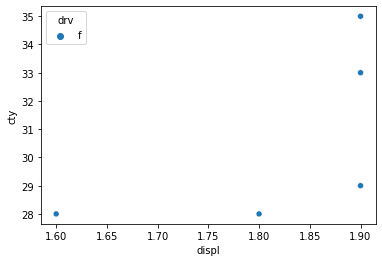

In [67]:
import seaborn as sns
sns.scatterplot(data = df, x = 'displ', y = 'cty', hue = 'drv')

```
#칼럼을 인덱스로 만드려면?
set_index("칼럼이름")

#인덱스를 칼럼으로 옮기기 위한 함수는?
.reset_index()

#셀마다 단어의 갯수를 알고 싶으면?
df['word'].str.len()
```

# 오늘 공부 시작

In [1]:
import json

In [2]:
geo = json.load(open('SIG.geojson.txt', encoding = 'UTF-8'))

In [3]:
geo['features'][0]['geometry']

{'type': 'MultiPolygon',
 'coordinates': [[[[127.58508551154958, 38.08062321552708],
    [127.58565575732702, 38.0802009066172],
    [127.58777905808203, 38.080354190085544],
    [127.58890487394689, 38.080881783588694],
    [127.59031267326897, 38.080596307998306],
    [127.59061778023133, 38.08053451807929],
    [127.59137292963024, 38.080476965118685],
    [127.59349548967889, 38.08031540227777],
    [127.594304166838, 38.080225164594665],
    [127.59529626584073, 38.08011430122607],
    [127.59683797157537, 38.079896764445195],
    [127.59703599139921, 38.07914773681181],
    [127.59756973764837, 38.07761547763786],
    [127.59794006383213, 38.07714541130494],
    [127.59816760846913, 38.07685681587356],
    [127.59847648881038, 38.076670284099194],
    [127.59956152109447, 38.076014995491754],
    [127.60022591131202, 38.07568645192285],
    [127.60034758173289, 38.075626138582486],
    [127.6014570759825, 38.07461119532391],
    [127.60157555080873, 38.07455485196505],
    [127.6

In [4]:
import pandas as pd

In [5]:
df_pop = pd.read_csv('Population_SIG.csv')
df_pop.head()

,code,region,pop
0,11,서울특별시,9509458
1,11110,종로구,144683
2,11140,중구,122499
3,11170,용산구,222953
4,11200,성동구,285990


In [6]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   code    278 non-null    int64 
 1   region  278 non-null    object
 2   pop     278 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.6+ KB


In [7]:
df_pop['code'] = df_pop['code'].astype('str')
df_pop['code']

0         11
1      11110
2      11140
3      11170
4      11200
       ...  
273    48880
274    48890
275       50
276    50110
277    50130
Name: code, Length: 278, dtype: object

In [13]:
pip install folium

  Using cached folium-0.12.1.post1-py2.py3-none-any.whl (95 kB)
  Using cached branca-0.5.0-py3-none-any.whl (24 kB)
Note: you may need to restart the kernel to use updated packages.


In [14]:
import folium

map_sig = folium.Map(location=[35.95, 127.7], zoom_start=7, tiles='cartodb positron')

bins = list(df_pop['pop'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]))
folium.Choropleth(geo_data= geo, data = df_pop, columns = ('code','pop'),
                  key_on = 'feature.properties.SIG_CD',
                 fill_color="YlGnBu",
                 fill_opacity=1,
                 line_opacity=0.5,
                 bins=bins).add_to(map_sig)
map_sig

In [27]:
import json
geo_seoul = json.load(open('EMD_Seoul.geojson', encoding = 'UTF-8'))

In [28]:
geo_seoul['features'][0]['properties']

{'BASE_DATE': '20200630',
 'ADM_DR_CD': '1101053',
 'ADM_DR_NM': '사직동',
 'OBJECTID': '1'}

In [29]:
geo_seoul['features'][0]['geometry']

{'type': 'MultiPolygon',
 'coordinates': [[[[126.97398562200112, 37.578232670691676],
    [126.97400165856983, 37.578091598158124],
    [126.97401347517625, 37.57797124764524],
    [126.97402588957173, 37.57786305895336],
    [126.97403969022386, 37.57773527607586],
    [126.97405282759235, 37.57763245751229],
    [126.97405724608929, 37.57759228442397],
    [126.97406454937413, 37.5775223449396],
    [126.97406606875553, 37.57751912550699],
    [126.97406875866477, 37.57749510583154],
    [126.97406829700772, 37.5774925030879],
    [126.97406834313652, 37.57749109719524],
    [126.97415332533838, 37.57749252255686],
    [126.97415369692854, 37.57749636934987],
    [126.97414192870245, 37.577607692520026],
    [126.97412902832193, 37.57772060121065],
    [126.97417294290439, 37.57749796032778],
    [126.97417276162724, 37.57749252680757],
    [126.9742642955674, 37.577008320942475],
    [126.97428742236072, 37.576886350575165],
    [126.97430268332849, 37.57679306561384],
    [126.9743

In [30]:
foreigner = pd.read_csv('Foreigner_EMD_Seoul.csv')
foreigner.head()

,code,region,pop
0,1101053,사직동,418.0
1,1101054,삼청동,112.0
2,1101055,부암동,458.0
3,1101056,평창동,429.0
4,1101057,무악동,102.0


In [31]:
foreigner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3490 entries, 0 to 3489
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   code    3490 non-null   int64  
 1   region  3490 non-null   object 
 2   pop     3486 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 81.9+ KB


In [32]:
foreigner['code'] = foreigner['code'].astype(str)

In [33]:
bins = list(foreigner['pop'].quantile([0,0.2,0.4,0.5,0.6,0.7,0.8,0.9,1]))
bins

[7.0, 98.0, 200.0, 280.0, 386.0, 529.5, 766.0, 1355.5, 26896.0]

In [56]:
map_seoul = folium.Map(location = [37.56, 127],
                      zoom_start = 12,
                      tiles = 'cartodbpositron')

folium.Choropleth(
    geo_data = geo_seoul,
    data = foreigner,
    columns = ('code', 'pop'),
    key_on = 'feature.properties.ADM_DR_CD',
    fill_color = 'PuBuGn',
    nan_fill_color = 'White',
    fill_opacity = 1,
    line_opacity = 0.5,
    bins = bins).add_to(map_seoul)

map_seoul

In [34]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [35]:
import pydataset

In [37]:
mpg = pydataset.data('mpg')

In [38]:
import plotly.express as px

In [41]:
import matplotlib.pyplot as plt

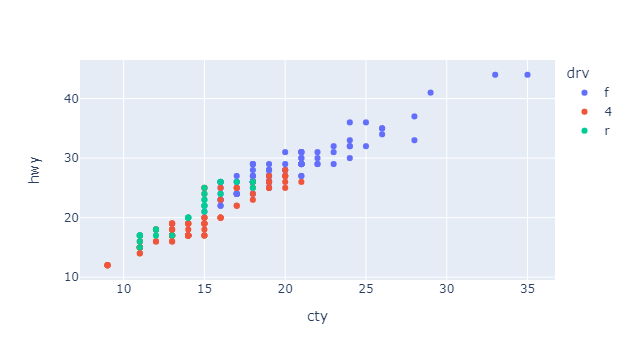

In [46]:
fig = px.scatter(data_frame = mpg, x='cty', y='hwy', color='drv')
fig

In [54]:
df = mpg.groupby('class')[['class']].agg('count')
df = df.rename({'class':'n'}, axis =1)
df = df.reset_index()

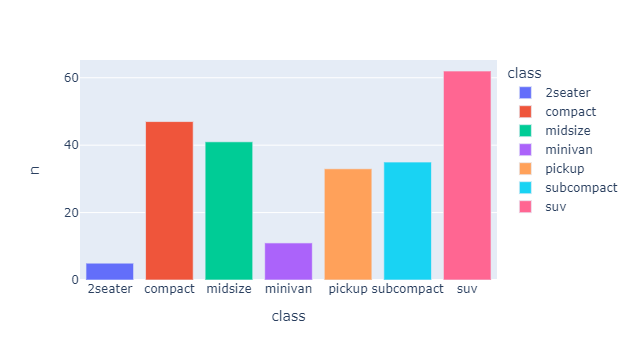

In [55]:
px.bar(data_frame=df, x='class',y='n',color='class')